# Assignment 02

### 1. Data

- Generate a set of $m$ point pairs $\{ (x^{(i)}, y^{(i)}) \}_{i = 1}^m$ from random perturbations using `random` function based on a linear function that you define
- $\hat{y} = a x + b$ where $a, b \in \mathbb{R}$
- $y = \hat{y} + n$ where $n \sim \mathcal{N}(0, \sigma^2)$ is drawn from the normal distribution with mean $0$ and standard deviation $\sigma$
- Choose $m=1000, a=2, b=1$ and $\sigma=0.5$

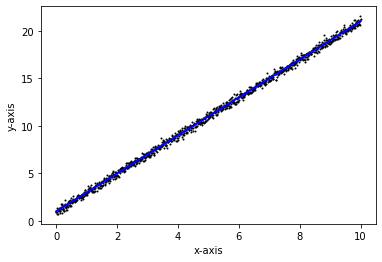

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# number of trial
m = 1000 

# standard diviation
sigma = 0.5               

# linear function
a = 2; b = 1
f = lambda x: a * x + b 

# generate samples of x
x = np.linspace(0,10,m) 
y_bar = []; y = []

# generate linear function and linear function with noise
for i in range(len(x)):
  y_bar.append(f(x[i]))
  y.append(f(x[i]) + np.random.normal(0,sigma**2))

# plot the figure
plt.plot(x,y,'ko', linewidth=0, markersize=1)
plt.plot(x,y_bar,'b', linewidth=2)
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()


### 2. Linear Model

- $h_\theta(x) = \theta_0 + \theta_1 x$, $\quad$ where $\theta = (\theta_0, \theta_1)$ and $\theta_0, \theta_1 \in \mathbb{R}$

where 

$\theta_{0}=\frac{\left(\Sigma y\right)\left(\Sigma x^{2}\right)-\left(\Sigma x\right)\left(\Sigma xy\right)}{m\left(\Sigma x^{2}\right)-\left(\Sigma x\right)^{2}}$

$\theta_{1}=\frac{m\left(\Sigma xy\right)-\left(\Sigma x\right)\left(\Sigma y\right)}{m\left(\Sigma x^{2}\right)-\left(\Sigma x\right)^{2}}$


theta_0 = 0.9824
theta_1 = 2.0012


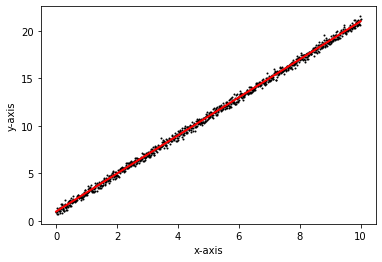

In [33]:
# convert list to array
x = np.array(x)

# calculate linear regression parameters
theta0 = (sum(y)*sum(x**2) - sum(x)*sum(x*y)) / ( m * sum(x**2) - sum(x)**2)
theta1 = (m*sum(x*y) - sum(x)*sum(y))/ ( m * sum( x**2 ) - sum(x)**2)

# print out the value of theta
print('theta_0 = %.4f' % theta0)
print('theta_1 = %.4f' % theta1)

# plot the figure
plt.plot(x,y,'ko', linewidth=0, markersize=1)
plt.plot(x, theta0 + theta1 * x,'r', linewidth=2)
plt.ylabel('y-axis')
plt.xlabel('x-axis')
plt.show()

### 3. Objective Function
- $J(\theta) = \frac{1}{2 m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2$

In [34]:
# create lists to collect information for plot
col_theta0 = []
col_theta1 = []
obj_func = []

# learning rate
alpha = 0.01

# theta_0 and theta_1 initial
theta0 = 2; theta1 = 1
col_theta0.append(theta0)
col_theta1.append(theta1)

# update the theta0 and theta1 following gradient formular
for iteration in range(5000):
  h_theta = lambda x: theta0 + theta1 * x
  total1 = 0; total2 = 0; total3 = 0
  for i in range(m):
    total1 += (h_theta(x[i]) - y[i])**2
    total2 += h_theta(x[i]) - y[i]
    total3 += (h_theta(x[i]) -  y[i])*x[i]
  theta0 = theta0 - alpha*1/m*total2
  theta1 = theta1 - alpha*1/m*total3
  obj_func.append(1/(2*m)*total1)
  col_theta0.append(theta0)
  col_theta1.append(theta1)
  tol = 1/(2*m)*total1

# print out the value
print('theta_0 = %.4f' % theta0)
print('theta_1 = %.4f' % theta1)
print('MSE = %.4f' % tol)

theta_0 = 0.9824
theta_1 = 2.0012
MSE = 0.0320


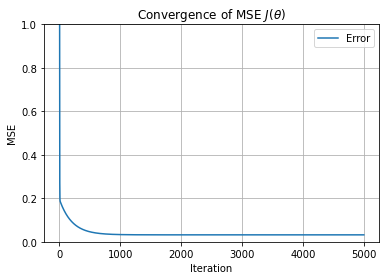

In [37]:
# plot the figure of objective function
plt.plot(obj_func)
plt.ylim([0,1])
plt.grid()
plt.ylabel('MSE')
plt.xlabel('Iteration')
plt.legend(['Error'])
plt.title('Convergence of MSE $J(\\theta)$')
plt.show()

### 4. Gradient Descent
 
- $\theta_0^{(t+1)} := \theta_0^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})$
- $\theta_1^{(t+1)} := \theta_1^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x^{(i)}$
- Choose a step-size (learning rate) $\alpha = 0.01$
- you can choose any initial conditions for $\theta_0^{(0)}=2$ and $\theta_1^{(0)}=1$

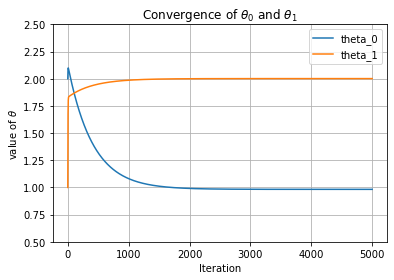

In [36]:
# plot the figure of the model parameter
plt.plot(col_theta0)
plt.plot(col_theta1)
plt.ylim([0.5,2.5])
plt.ylabel('value of $\\theta$')
plt.xlabel('Iteration')
plt.legend(['theta_0','theta_1'])
plt.grid()
plt.title('Convergence of $\\theta_0$ and $\\theta_1$')
plt.show()